In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import os, shutil, pathlib
import numpy as np
import matplotlib.pyplot as plt

## Data Augmentation

**Loading images**

In [40]:
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [41]:
train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Image augmentation

In [42]:
augmentation = Sequential([RandomFlip("horizontal"), RandomRotation(0.1), RandomZoom(0.2)])

**Integrating model with image augmentation and dropout**

In [43]:
inputs = Input(shape=(180, 180, 3))

x = augmentation(inputs)

x = Rescaling(1./255)(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

**Training the regularized convnet**

In [44]:
callbacks = [ModelCheckpoint(filepath="cat-dog-augmented.keras", save_best_only=True, monitor="val_loss")]
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 13s 164ms/step - loss: 0.7027 - accuracy: 0.5170 - val_loss: 0.6906 - val_accuracy: 0.6040
Epoch 2/100
63/63 [==============================] - 10s 158ms/step - loss: 0.7038 - accuracy: 0.5380 - val_loss: 0.6852 - val_accuracy: 0.5760
Epoch 3/100
63/63 [==============================] - 10s 158ms/step - loss: 0.6948 - accuracy: 0.5400 - val_loss: 0.6835 - val_accuracy: 0.5810
Epoch 4/100
63/63 [==============================] - 10s 158ms/step - loss: 0.6865 - accuracy: 0.5830 - val_loss: 0.6565 - val_accuracy: 0.5970
Epoch 5/100
63/63 [==============================] - 10s 158ms/step - loss: 0.6683 - accuracy: 0.6115 - val_loss: 0.6323 - val_accuracy: 0.6500
Epoch 6/100
63/63 [==============================] - 10s 159ms/step - loss: 0.6326 - accuracy: 0.6530 - val_loss: 0.6559 - val_accuracy: 0.6130
Epoch 7/100
63/63 [==============================] - 10s 158ms/step - loss: 0.6136 - accuracy: 0.6780 - val_loss: 0.6628 - val_accuracy:

Epoch 41/100
63/63 [==============================] - 10s 156ms/step - loss: 0.2749 - accuracy: 0.8915 - val_loss: 0.6368 - val_accuracy: 0.7750
Epoch 42/100
63/63 [==============================] - 10s 157ms/step - loss: 0.2457 - accuracy: 0.9035 - val_loss: 0.6839 - val_accuracy: 0.7890
Epoch 43/100
63/63 [==============================] - 10s 157ms/step - loss: 0.2504 - accuracy: 0.9010 - val_loss: 0.5834 - val_accuracy: 0.8140
Epoch 44/100
63/63 [==============================] - 10s 156ms/step - loss: 0.2270 - accuracy: 0.9040 - val_loss: 0.9917 - val_accuracy: 0.7450
Epoch 45/100
63/63 [==============================] - 10s 158ms/step - loss: 0.2647 - accuracy: 0.8935 - val_loss: 0.7334 - val_accuracy: 0.7710
Epoch 46/100
63/63 [==============================] - 10s 156ms/step - loss: 0.2371 - accuracy: 0.9045 - val_loss: 0.6806 - val_accuracy: 0.7970
Epoch 47/100
63/63 [==============================] - 10s 156ms/step - loss: 0.2235 - accuracy: 0.9090 - val_loss: 0.8570 - val_ac

63/63 [==============================] - 10s 156ms/step - loss: 0.1565 - accuracy: 0.9510 - val_loss: 1.5781 - val_accuracy: 0.7950
Epoch 98/100
63/63 [==============================] - 10s 158ms/step - loss: 0.1408 - accuracy: 0.9590 - val_loss: 1.3037 - val_accuracy: 0.7940
Epoch 99/100
63/63 [==============================] - 10s 158ms/step - loss: 0.1308 - accuracy: 0.9580 - val_loss: 1.2164 - val_accuracy: 0.8080
Epoch 100/100
63/63 [==============================] - 10s 157ms/step - loss: 0.1253 - accuracy: 0.9605 - val_loss: 1.4923 - val_accuracy: 0.8010


***Plotting***

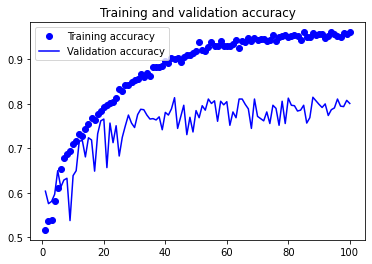

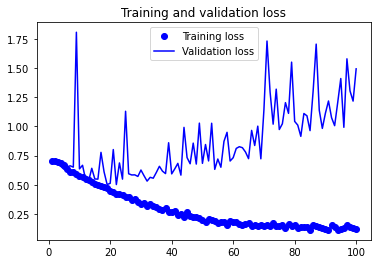

In [46]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [45]:
test_model = load_model("cat-dog-augmented.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 17ms/step - loss: 0.5093 - accuracy: 0.7480
Test accuracy: 0.748
